In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
import math
%matplotlib inline

In [2]:
# load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# look at the few rows in train dataset
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
#explore our dataset by statistics features
pd.set_option('display.float_format',lambda x : '%.2f'% x)
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


In [4]:
# drop vendor_id column when show statistics about some of our features
df_train.drop('vendor_id',axis = 1).describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.66,-73.97,40.75,-73.97,40.75,959.49
std,1.31,0.07,0.03,0.07,0.04,5237.43
min,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,9.00,-61.34,51.88,-61.34,43.92,3526282.00


From the above statistic results, we can see that the pair (longitude, latitude) are clustered in a small region around (-74,40), which is the location of New York. However, there are some outliers in longitude due to GPS error. We need to do some data cleaning work. Besides, **trip_duration** recorded in seconds as our **true label** value also has some outliers, like max is equal to just over 40 days, which is obviously an erroness measurement. Therefore, we need to take **data cleaning** on our train dataset.

## Data Cleaning

In [5]:
# longitutde outliers
num_longitude_outliers = df_train[df_train['pickup_longitude']<-74.2].shape[0]
num_longitude_outliers

82

In [6]:
# the proportion of vendor_id as 2
(df_train['vendor_id']==2).mean()

0.5349502688798637

In [7]:
# the type of store_and_fwd_flag is boolean type data 
# find the proportion of store_and_fwd_flag that is positive
(df_train['store_and_fwd_flag']=='Y').mean()  

0.005515396491535975

In [8]:
#convert pickup_datetime to timestamp
df_train['pickup_dt'] = pd.to_datetime(df_train['pickup_datetime'])
df_test['pickup_dt'] = pd.to_datetime(df_test['pickup_datetime'])

In [9]:
a = [t for t in df_train['pickup_dt']]
a[:6]

[Timestamp('2016-03-14 17:24:55'),
 Timestamp('2016-06-12 00:43:35'),
 Timestamp('2016-01-19 11:35:24'),
 Timestamp('2016-04-06 19:32:31'),
 Timestamp('2016-03-26 13:30:55'),
 Timestamp('2016-01-30 22:01:40')]

In [ ]:
# data exploratory on the distribution of the dataset
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
plt.hist(a,bins=10000,label='train')
#plt.hist([x.to_pydatetime() for x in df_test['pickup_dt']],bins=100,label = 'test')
#plt.legend()
#plt.xlabel('Time')
#plt.ylabel('Number of rows')
#plt.title('Distribution of train/test data over time')
#plt.show()

## Data Visualization

/home/crystal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


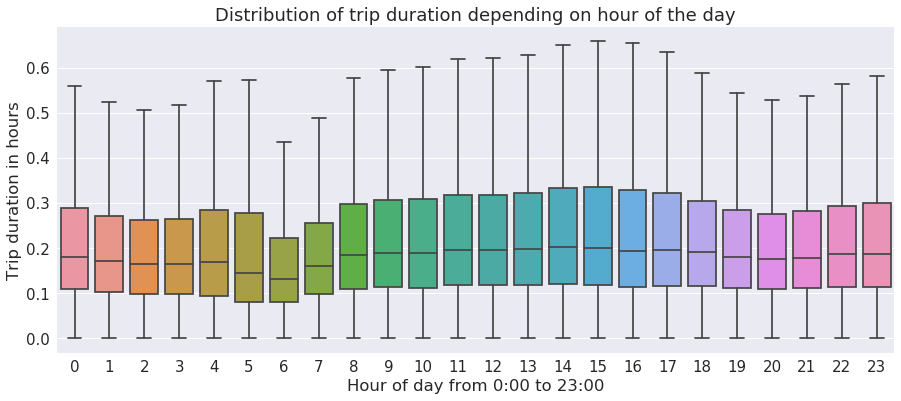

In [34]:
# get the hour of each sample
hours = np.array([t.hour for t in df_train['pickup_dt']])
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.boxplot(hours,df_train['trip_duration'].values/3600,showfliers = False)
plt.title('Distribution of trip duration depending on hour of the day')
plt.ylabel('Trip duration in hours')
plt.xlabel('Hour of day from 0:00 to 23:00')
plt.savefig('distribution of trip duration.eps')

In [25]:
# calculate the manhattan distance and speed
manhattan = (np.abs(df_train['pickup_latitude'] - df_train['dropoff_latitude'])) + (np.abs(df_train['pickup_longitude']
                                                                                          -df_train['dropoff_longitude']))
manhattan_speed = manhattan / df_train['trip_duration']

/home/crystal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


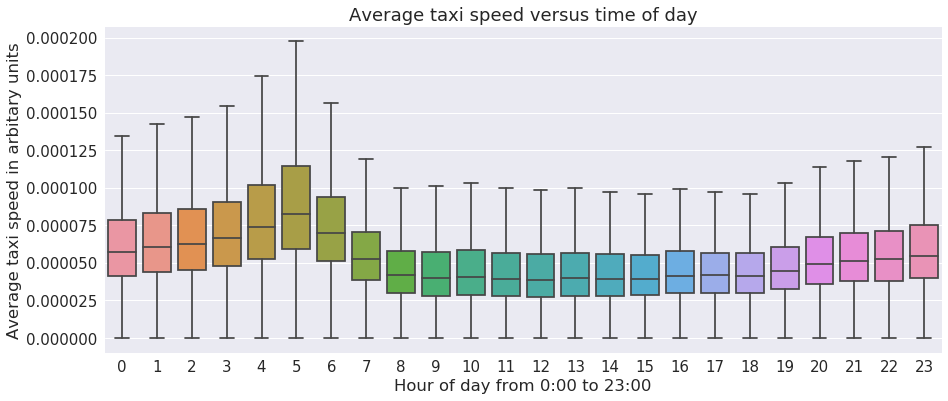

In [35]:
# plot speed against the time of the day
sns.set(font_scale=1.5)
plt.figure(figsize=(15,6))
sns.boxplot(hours,manhattan_speed,showfliers = False)
plt.title('Average taxi speed versus time of day')
plt.xlabel('Hour of day from 0:00 to 23:00')
plt.ylabel('Average taxi speed in arbitary units')
plt.savefig('Average taxi speed versus time of day.eps')

From the above figure, we can see that time plays pronounced effect on taxi speed. During the early morning, it is the time that taxi travels fastest, and then slows down very substantially (average taxi speed roughly halves)
beginning at 7:00 AM.

From the above analysis, we can see that time has a large effect on taxi trip duration. For this reason, I will focus on building features to capture this relationship as well as the relationship with taxi speed. 

In addition, we can look at the distribution of the target variable to understand what we are trying to predict:

In [ ]:
# plot target variable distribution, removing about 4000 outliers
sns.set(font_scale=1.5)
plt.figure(figsize=(6,5))
plt.hist(sorted(df_train['trip_duration'])[4000:-4000],bins = 100,normed = True)
plt.title('Distribution of target variable')
plt.ylabel('Proportion of rides')
plt.xlabel('Duration of the ride in seconds')
plt.show()
plt.savefig('distribution of target.eps')

/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


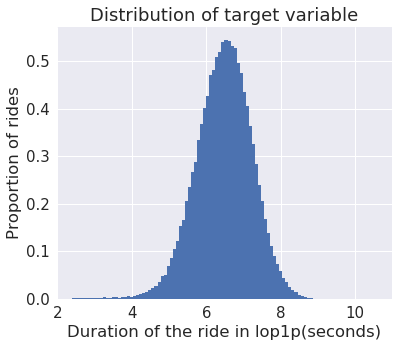

In [11]:
# Using log to plot distribution of the target variable,removing 4000 outliers
# log1p = log(1+x)
sns.set(font_scale = 1.5)
plt.figure(figsize=(6,5))
plt.hist(sorted(np.log1p(df_train['trip_duration']))[2000:-2000],bins = 100,normed = True)
plt.xlabel('Duration of the ride in lop1p(seconds)')
plt.title('Distribution of target variable')
plt.ylabel('Proportion of rides')
plt.savefig('log1p target.eps')

In [10]:
# calculate the 'predict' value for the benchmark model
benchmark_val = np.expm1(np.mean(np.log1p(df_train['trip_duration'])))

# calculate the RMSLE score of the benchmark model
benchmark_score = np.sqrt(np.mean((np.log1p(benchmark_val)-np.log1p(df_train['trip_duration']))**2))
benchmark_val

642.5362830049924

In [115]:
# create a submission based on the benchmark model to Kaggle
benchmark_sub = pd.DataFrame({'id':df_test['id'],'trip_duration':round(benchamark_val,2)})
benchmark_sub.to_csv('benchmark_submission.csv',index = False)

## Methodology

* Model selection: XGBoost known as Gradient Boosted Trees (GBT). There are a few basic XGBoost parameters need to be tuned to obtain optimal results:
    - ``max_depth`` : the maximum depth (number of splits in a branch) of each individual tree in the ensemble. default_set is 6
    * ``colsample_byleve`` : the proportion of input features which are available to the model to split on at each level of the tree. Dercreasing this means trees are more likely to be different, which can improve ensemble performance. default is 1.
    * ``subsample`` : the proportion of the data which each tree is trained on. Decreasing this has a 'bagging' effect, which works for the same reason as for ``colsample_bylevel``. default is 1.
    - ``min_child_weight`` : the minimum amount of 'weight' a tree node must have to be included. 'weight' loosely means how much it contributes to the model. Increasing thic can reduce overfitting. default is 1.
    - ``eta``: the learning rate (amount of reweighing between trees). Decreasing this always helps performance, but learning takes much longer for diminishing returns. default is 0.3.
* Data Preprocessing: to convert the data into a format which XGBoost can effectively use, as only numerical features are supported, some of our input features must first be transformed like **store_and_fwd_flag**.  
    * For pickup_datetime feature, it is more complicated to preprocess because it is string type in the form of "12/06/2016 15:32:12". To preprocess this feature, firstly it needs to transform the string to a Timestamp object by ``pandas`` package. Then, I am going to extract the following features:
        * **unix epoch time** : it allows the model to learn patterns over longer periods of time in the dataset. For example, some seasonal effect, or a gradual decrease/increase in speed over the period of the dataset.
        * ** the minute of the day** : it allows the regressor to model daily speed paterns like how the taxis move faster or slower at certain time.
        * ** the day of the week** : this feature allows the regressor to model different patterns during different days of the week - traffic condition are substantially different between weekdays and weekends.
    * **vendor_id** : this feature is  technically a categorical feature, it does not require preprocessing, such as one-hotting to create a separate feature for each vendor. This is because there are only two vendors, so the feature can be treated as a boolean feature representing “vendor 1 vs not vendor 1”.
    * Drop some features: like ``id``, it doesn't provide useful information on our trip_duration prediction. ``dropoff_datetime`` only appers on train dataset.
* Feature engineering : select useful features to help us build up tree-based XGBoost model. Tree-based models such as XGBoost are unable to model mathematical operations such as addition and subtraction between variables. This means some signal in the data which could provide a large boost to performance simply cannot be modelled: for this reason, it is important to compute these helpful features in the preprocessing phase.

In [1]:
# load our trained model
from sklearn.cross_validation import train_test_split
import xgboost as xgb
import pickle
import numpy as np

bst = xgb.Booster()
bst.load_model('model_result_opt.mdl')

/home/crystal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Get validation data
x_train,x_test,y_train,id_test = pickle.load(open('feature.bin','rb'))

# First we take the log1p of y_train
ytrain = np.log1p(y_train)

# We split off a validation set
x_train,x_valid,y_train,y_valid = train_test_split(x_train,ytrain, test_size = 0.2, random_state = 51)

In [3]:
# save p_valid
p_valid = bst.predict(xgb.DMatrix(x_valid))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

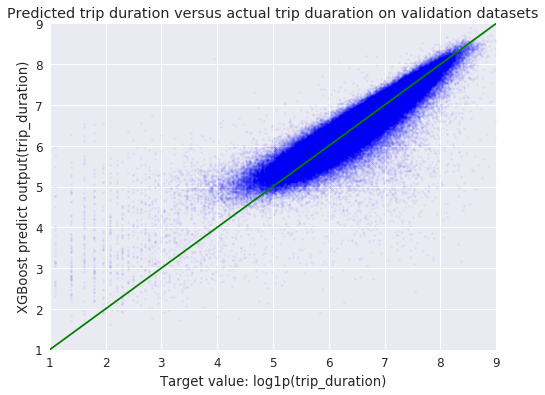

In [7]:
sns.set(font_scale = 1.2)
plt.figure (figsize=(8,6))
plt.scatter(y_valid,p_valid,s=4,color = 'blue',alpha = 0.05)
plt.plot([1,9],[1,9],color = 'green')
axes = plt.gca()
axes.set_xlim([1,9])
axes.set_ylim([1,9])
plt.xlabel('Target value: log1p(trip_duration)')
plt.ylabel('XGBoost predict output(trip_duration)')
plt.title('Predicted trip duration versus actual trip duaration on validation datasets')
plt.savefig('log1p_valid_pred.png')

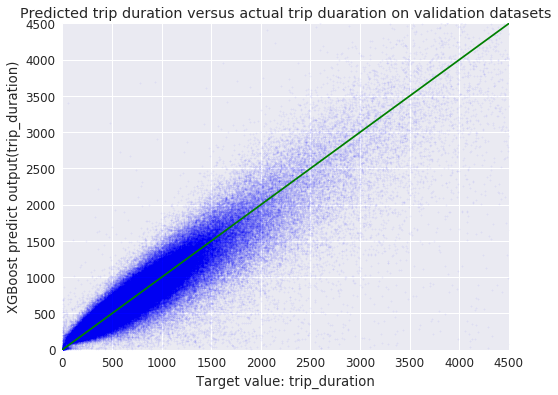

In [5]:
sns.set(font_scale = 1.2)
plt.figure (figsize=(9,6))
plt.scatter(np.expm1(y_valid),np.expm1(p_valid),s=2,color = 'blue',alpha = 0.05)
plt.plot([1,6000],[1,6000],color = 'green')
axes = plt.gca()
axes.set_xlim([0,4500])
axes.set_ylim([0,4500])
plt.xlabel('Target value: trip_duration')
plt.ylabel('XGBoost predict output(trip_duration)')
plt.title('Predicted trip duration versus actual trip duaration on validation datasets')
plt.savefig('valid_pred.png')

In [82]:
from mlxtend.plotting import category_scatter

data = pd.DataFrame({'target value':y_valid})
data['predict value'] = p_valid

plt.scatter(data.iloc[:,0])

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
sns.set(font_scale = 1.2)
plt.figure (figsize=(6,6))
#x_diff = np.clip(100 *  ((np.expm1(p_valid) - np.expm1(y_valid)) / np.expm1(y_valid)),0,100) 
plt.scatter(np.expm1(y_valid),np.expm1(p_valid))
#plt.colorbar()
plt.xlabel('Target value: trip_duration')
plt.ylabel('XGBoost predict output(trip duration)')
#pltxlim( 0, 800000 )
#plt.ylim( 0, 800000 )
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#plt.savefig('./HousePrices-XGb-' + str(folds) + 'fold-train-predictions-01-v2.png')
plt.show(block=False)

In [14]:
# added requried data to the df
x_valid['hour'] = (x_valid['daily_minute']/60).astype(np.int)
x_valid['real'] = y_valid
x_valid['predict'] = p_valid

In [15]:
# calculate score for each hour
def rmse(x):
    return np.sqrt(np.mean((x['real'] - x['predict'])**2))
scores = x_valid.groupby('hour').apply(rmse)

In [ ]:
sns.set(font_scale = 1.2)
plt.figure(figsize = (12,4))
plt.plot(scores,marker = 'D')
plt.ylim([0.2,0.5])
plt.xlim([0,23])
axes = plt.gca()
axes.set_xticks(np.arange(0,24))
plt.title('RMSLE scores across time of day')
plt.ylabel('Validation RMSLE scores')
plt.xlabel('Hour of day')
plt.savefig('rmsle_score.eps')

In [20]:
#calculate proportion of samples predicted within 20% of the true value
((np.abs(np.expm1(p_valid)-np.expm1(y_valid)))/np.expm1(y_valid)<0.2).mean()

0.5909354229438966

In [21]:
#same as above, but for the benchmark
((np.abs(642.53-np.expm1(y_valid)))/np.expm1(y_valid)<0.2).mean()

0.21499062486074405

In [22]:
# Get importances from the xgboost model
importances = bst.get_fscore()

importances = sorted(importances.items(),key = lambda x: x[1],reverse = True)
print(importances)

[('pickup_longitude', 506742), ('pickup_latitude', 407248), ('dropoff_longitude', 353654), ('unix_time', 332827), ('dropoff_latitude', 301802), ('daily_minute', 281882), ('dist_l1', 228301), ('delta_lat', 219078), ('dist_l2', 187978), ('hourly_count', 186635), ('daily_count', 173503), ('dist_haversine', 155640), ('passenger_count', 149159), ('vendor_id', 117669), ('haversine_time_estim', 113546), ('day_of_week', 87902), ('angle', 5044), ('store_and_fwd_flag', 2713)]


In [10]:
df = pd.DataFrame(importances)
df.iloc[:,0]


0         pickup_longitude
1          pickup_latitude
2        dropoff_longitude
3                unix_time
4         dropoff_latitude
5             daily_minute
6                  dist_l1
7                delta_lat
8                  dist_l2
9             hourly_count
10             daily_count
11          dist_haversine
12         passenger_count
13               vendor_id
14    haversine_time_estim
15             day_of_week
16                   angle
17      store_and_fwd_flag
Name: 0, dtype: object

/home/crystal/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/crystal/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


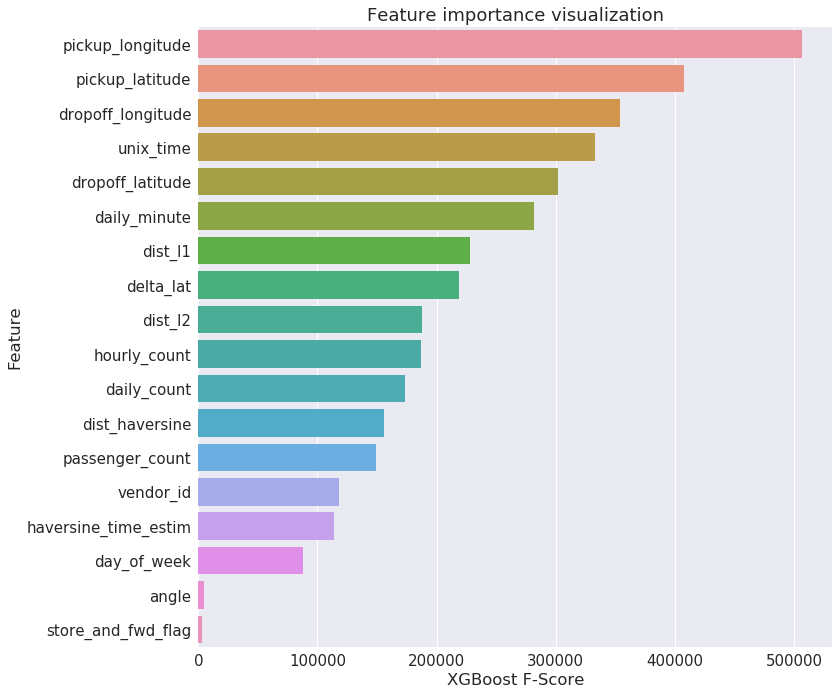

In [27]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (12,10))
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
sns.barplot(df.iloc[:,1],df.iloc[:,0])
plt.xlabel('XGBoost F-Score')
plt.ylabel('Feature')
plt.title('Feature importance visualization')
plt.savefig('featureimportance.eps' )